<a href="https://colab.research.google.com/github/shubhamgogri/StockMarketAnalysis/blob/main/StockMarketLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
!pip install -q yfinance
!pip install --upgrade pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime

In [ ]:
stocks = ['AAPL' , 'GOOG', 'MSFT', 'AMZN']
# current time
end = datetime.now()
# last year
start = datetime(end.year - 1, end.month, end.day)

for item in stocks:
  globals()[item] = yf.download(item, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks = [AAPL, GOOG, MSFT, AMZN]
type(stocks)

list

In [ ]:
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
for company, common_name in zip(stocks, company_name):
  company["company_name"] = common_name
    
df = pd.concat(stocks, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-09,89.470001,89.480003,85.870003,86.139999,86.139999,90796200,AMAZON
2022-11-10,92.940002,98.690002,91.650002,96.629997,96.629997,173414900,AMAZON
2022-11-11,97.879997,101.190002,96.660004,100.790001,100.790001,111481700,AMAZON
2022-11-14,98.769997,100.120003,97.290001,98.489998,98.489998,99533100,AMAZON
2022-11-15,103.209999,103.790001,97.339996,98.940002,98.940002,111336300,AMAZON
2022-11-16,96.849998,98.489998,95.540001,97.120003,97.120003,87958800,AMAZON
2022-11-17,95.370003,96.970001,94.029999,94.849998,94.849998,82617900,AMAZON
2022-11-18,95.949997,95.989998,92.480003,94.139999,94.139999,72336500,AMAZON
2022-11-21,93.970001,95.019997,90.589996,92.459999,92.459999,84330300,AMAZON


In [ ]:
df['company_name'].unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2021-11-23 to 2022-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1008 non-null   float64
 1   High          1008 non-null   float64
 2   Low           1008 non-null   float64
 3   Close         1008 non-null   float64
 4   Adj Close     1008 non-null   float64
 5   Volume        1008 non-null   int64  
 6   company_name  1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,173.076211,175.419070,170.544243,172.962586,172.398144,5.642942e+07
std,66.171345,66.727808,65.363959,66.081890,65.332592,3.537933e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,1.297800e+07
25%,123.537498,125.383753,121.327499,124.274502,124.274502,2.815828e+07
50%,150.645004,152.841248,148.119995,150.674995,150.485367,4.748875e+07
75%,191.360004,192.307503,187.697495,190.069996,189.131775,7.695830e+07
max,343.149994,344.299988,340.320007,342.540009,339.360168,2.726620e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-23 to 2022-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.030397,160.216230,155.969405,158.172421,157.615200,9.119690e+07
std,12.844103,12.657985,12.885869,12.777798,12.570723,2.592477e+07
min,130.070007,132.389999,129.039993,130.059998,129.664490,5.121820e+07
25%,147.162502,149.844997,145.177502,147.997498,147.885014,7.363840e+07
50%,159.470001,161.495003,156.340004,158.715004,158.053680,8.659620e+07
75%,169.232502,171.057503,167.220001,168.970005,168.350845,1.024875e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.954327e+08


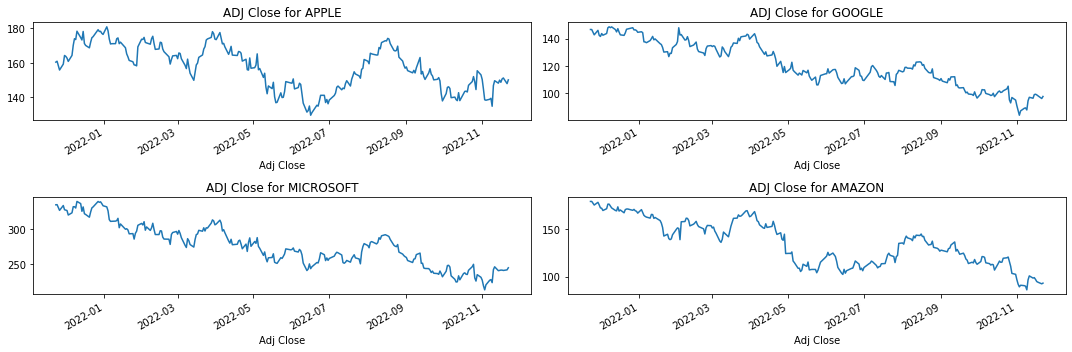

In [ ]:
plt.figure(figsize= (15,5))

for i, company  in enumerate(stocks, 1):
  plt.subplot(2,2, i)
  company['Adj Close'].plot()
  plt.xlabel('Adj Close')
  plt.title('ADJ Close for ' + company_name[i-1] )

plt.tight_layout()

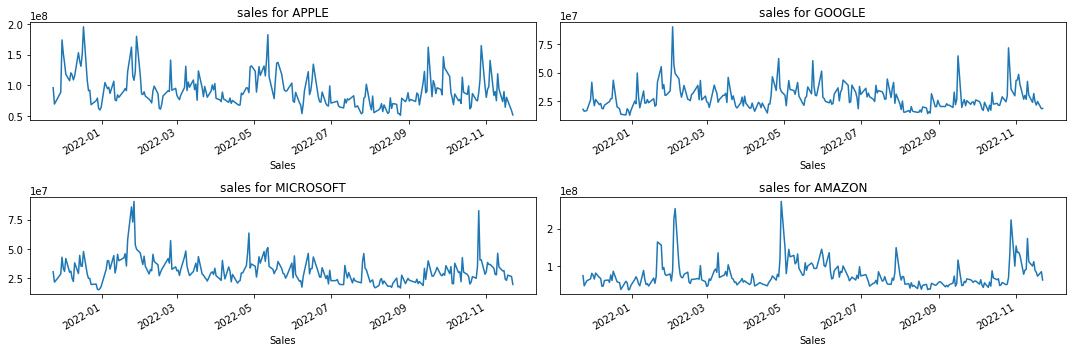

In [ ]:
plt.figure(figsize = (15,5))
for i, company  in enumerate(stocks, 1):
  plt.subplot(2,2, i)
  company['Volume'].plot()
  plt.xlabel('Sales')
  plt.title('sales for ' + company_name[i-1] )

plt.tight_layout()

2. What was the moving average of the various stocks?¶


In [ ]:
company.index

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-06', '2021-12-07',
               ...
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-21', '2022-11-22'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stocks:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


In [ ]:
AMZN.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')

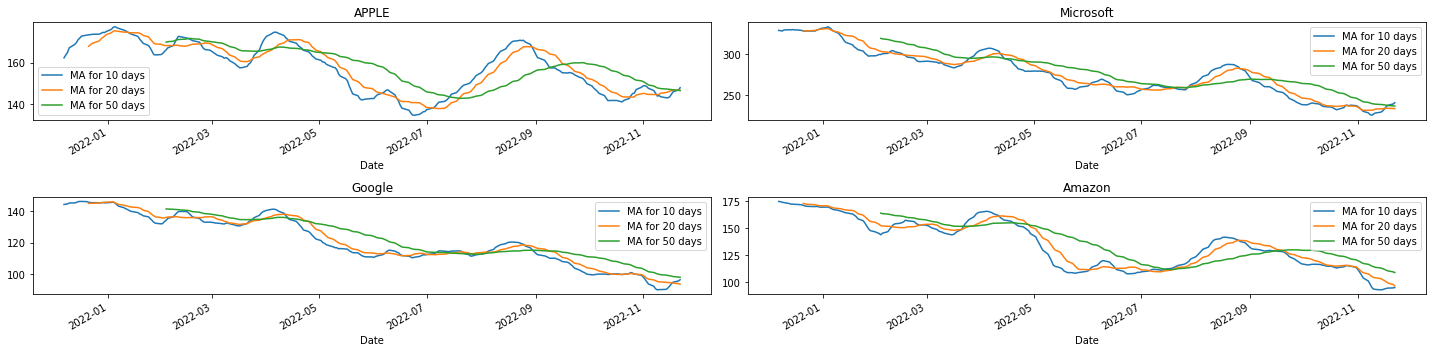

In [ ]:
fig, axes = plt.subplots(nrows = 2,ncols=  2)
fig.set_figheight(5)
fig.set_figwidth(20)
AAPL[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title("APPLE")
MSFT[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title("Microsoft")

GOOG[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title("Google")

AMZN[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title("Amazon")

fig.tight_layout()

A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend.


3. What was the daily return of the stock on average?¶


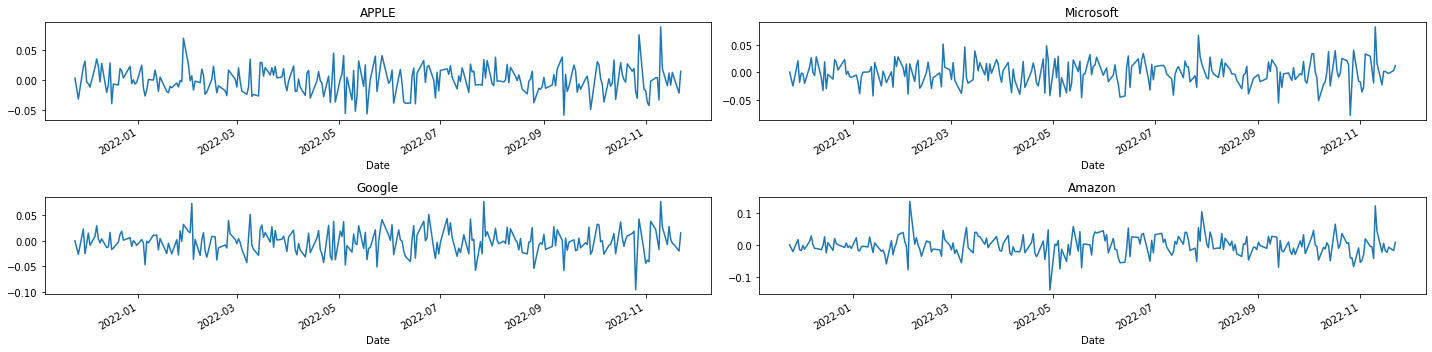

In [ ]:
for company in stocks:
  company['Daily Return'] = company['Adj Close'].pct_change()
# pct_change = percentage change between the current and a prior element.

fig, axes = plt.subplots(nrows = 2,ncols=  2)
fig.set_figheight(5)
fig.set_figwidth(20)
AAPL['Daily Return'].plot(ax = axes[0,0])
axes[0,0].set_title("APPLE")

MSFT['Daily Return'].plot(ax = axes[0,1])
axes[0,1].set_title("Microsoft")

GOOG['Daily Return'].plot(ax = axes[1,0])
axes[1,0].set_title("Google")

AMZN['Daily Return'].plot(ax = axes[1,1])
axes[1,1].set_title("Amazon")

fig.tight_layout()

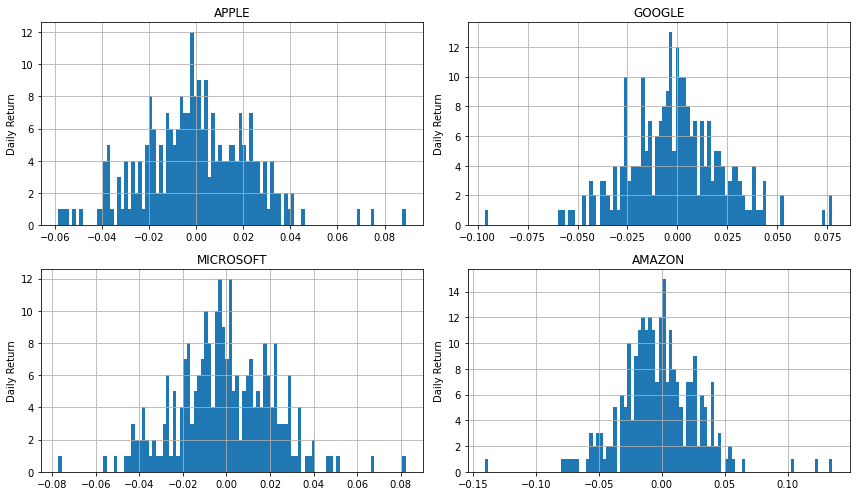

In [ ]:
plt.figure(figsize=(12, 7))
for i, company   in enumerate(stocks, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins= 100)
  plt.title(company_name[i-1])
  plt.ylabel('Daily Return')

plt.tight_layout()

4. What was the correlation between different stocks closing prices?

In [ ]:
from pandas_datareader.data import DataReader

closing_df = DataReader(company_name, 'yahoo', start, end)['Adj Close']
closing_df.head()

RemoteDataError: ignored

### APPLE STOCK PREDICITONS


In [ ]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519279
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726294
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859331
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838930


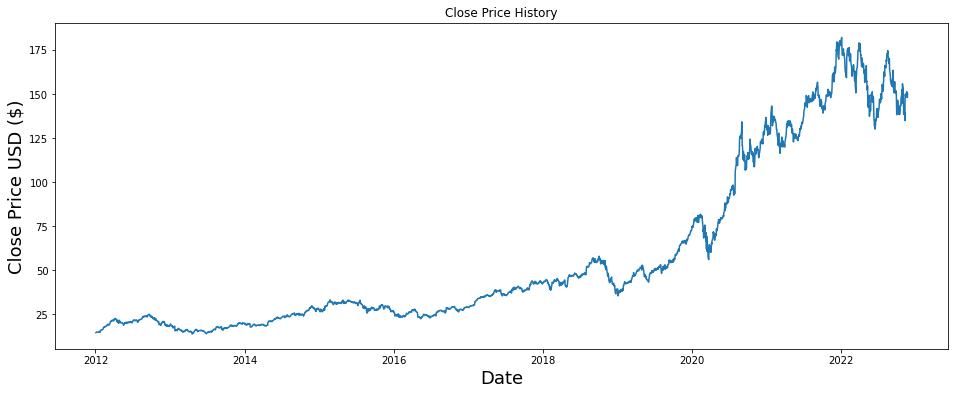

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])

In [ ]:
data.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [ ]:
data = data.values

In [ ]:
data.shape

(2742, 1)

In [ ]:
# get the number of rows to train the data 
training_length  = int(len(data) *.95)

In [ ]:
training_length

2604

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.81721085],
       [0.7976943 ],
       [0.81060616]])

In [ ]:
# get the training data
train_data = scaled_data[0:training_length, :]

In [ ]:
# split data into train and test data
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0] )
  y_train.append(train_data[i, 0])
  
X_train

In [ ]:
print(X_train[0])
print(y_train[0])

[0.00439887 0.00486851 0.00584391 0.00677256 0.00663019 0.00695107
 0.00680444 0.00655793 0.00622217 0.00726133 0.00819848 0.00790947
 0.0063263  0.00783722 0.00634968 0.01192796 0.01149658 0.01205972
 0.01327737 0.01401476 0.01395314 0.01372576 0.01469479 0.01560643
 0.01663922 0.01830739 0.02181161 0.02186474 0.02381555 0.02527333
 0.0227679  0.02373267 0.02371354 0.02641875 0.02603411 0.026746
 0.02802528 0.02873719 0.03078787 0.03228178 0.03271317 0.03286405
 0.03030973 0.02969346 0.02978484 0.03218616 0.03286193 0.03431335
 0.03773469 0.04229932 0.04144504 0.04144716 0.04474738 0.04578017
 0.04504489 0.04437338 0.04367423 0.04599691 0.04759072 0.04825798]
0.04660893460974819


In [ ]:
X_train = np.array(X_train)
# reshape the data to create the batches
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )

In [ ]:
X_train.shape

(2544, 60, 1)

In [ ]:
y_train = np.array(y_train)

In [ ]:
y_train.shape

(2544,)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(128, return_sequences= True, input_shape = (X_train.shape[1], 1)) )
model.add(Dropout(rate = 0.2))

model.add(LSTM(128, return_sequences= True, input_shape = (X_train.shape[1], 1)) )
model.add(Dropout(rate = 0.2))

model.add(LSTM(128, return_sequences= True, input_shape = (X_train.shape[1], 1)) )
model.add(Dropout(rate = 0.2))

model.add(LSTM(64))
model.add(Dropout(rate = 0.2))

model.add(Dense(1))

model.compile(optimizer= 'adam',loss= 'mean_squared_error')

model.fit(X_train, y_train, batch_size =32, epochs= 20 )

Epoch 1/20
80/80 [==============================] - 37s 355ms/step - loss: 0.0089
Epoch 2/20
80/80 [==============================] - 28s 351ms/step - loss: 0.0015
Epoch 3/20
80/80 [==============================] - 28s 351ms/step - loss: 0.0016
Epoch 4/20
80/80 [==============================] - 28s 352ms/step - loss: 0.0016
Epoch 5/20
80/80 [==============================] - 28s 353ms/step - loss: 0.0016
Epoch 6/20
80/80 [==============================] - 28s 352ms/step - loss: 0.0018
Epoch 7/20
80/80 [==============================] - 28s 352ms/step - loss: 0.0012
Epoch 8/20
80/80 [==============================] - 28s 354ms/step - loss: 0.0013
Epoch 9/20
80/80 [==============================] - 28s 355ms/step - loss: 0.0013
Epoch 10/20
80/80 [==============================] - 28s 353ms/step - loss: 0.0013
Epoch 11/20
80/80 [==============================] - 28s 349ms/step - loss: 0.0012
Epoch 12/20
80/80 [==============================] - 28s 351ms/step - loss: 0.0012
Epoch 13/20
8

In [ ]:
# creating test data set
test_data = scaled_data[training_length-60: , :]  
x_test = []
y_test = []

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0] )

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

5/5 [==============================] - 4s 101ms/step


In [ ]:
prediction.shape

(138, 1)

In [ ]:
data = df.filter(['Close'])

In [ ]:
train = data[:training_length]
valid = data[training_length:]

In [ ]:
valid.shape

(138, 1)

In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
valid['Prediction'] = prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
valid.head()

,Close,Prediction
Date,,
2022-05-09,152.059998,157.906693
2022-05-10,154.509995,157.592484
2022-05-11,146.500000,157.120590
2022-05-12,142.559998,156.355865
2022-05-13,147.110001,155.186829


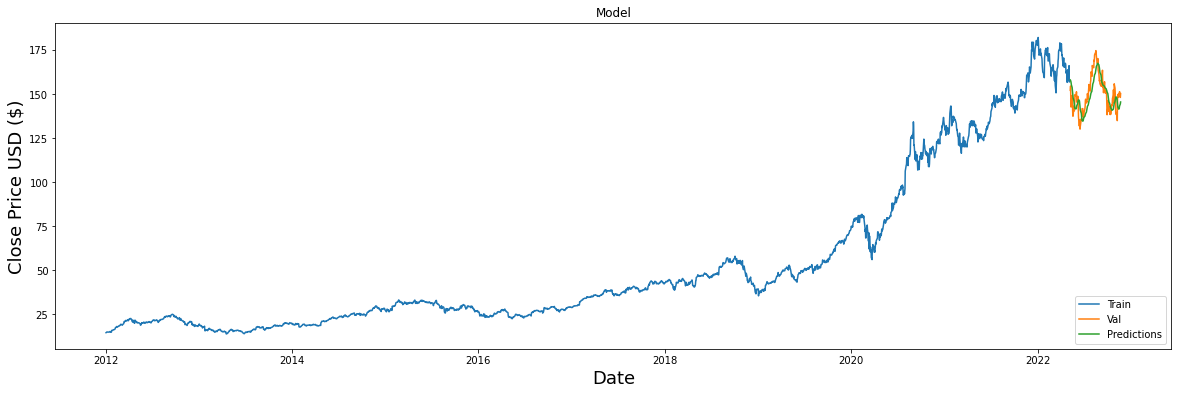

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

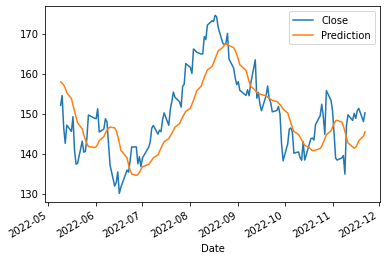

In [ ]:
valid.plot()
# plt.plot(valid['Close'], valid['Prediction'])